In [1]:
import numpy as np
import os # operating system
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# a_list = [[11, 12], 
#           [21, 22], 
#           [31, 32]]
# a_list

[[11, 12], [21, 22], [31, 32]]

In [9]:
# a_array = np.array(a_list)
# a_array

array([[11, 12],
       [21, 22],
       [31, 32]])

In [11]:
a_array.T.dot()

TypeError: dot() missing required argument 'b' (pos 1)

In [12]:
class Adaline(object):
    """Adaline classifier.
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight
        initialization.
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of
            examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
            
        Returns
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1]) # number of columns (features) + 1
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [13]:
s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases',
                 'iris','iris.data')
print('URL:', s)

URL: https://archive.ics.uci.edu\ml\machine-learning-databases\iris\iris.data


In [15]:
df = pd.read_csv('iris.data', header=None, encoding='utf-8')
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
# Next, we extract the first 100 class labels that correspond to the 50 Iris-setosa and
# 50 Iris-versicolor flowers and convert the class labels into the two integer class labels,
# 1 (versicolor) and -1 (setosa)

# select setosa and versicolor
y = df.iloc[0:100, 4].values
# y

In [17]:
y = np.where(y == 'Iris-setosa', -1, 1)
# y

In [18]:
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values
# X

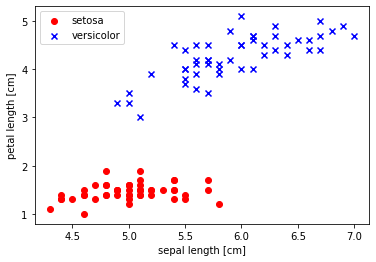

In [19]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

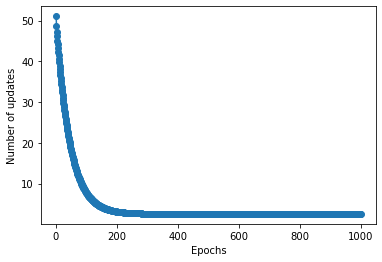

In [32]:
# Training
ppn = Adaline(eta=0.0001, n_iter=1000)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.cost_) + 1),
        ppn.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [37]:
# Decision regions
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 5, X[:, 0].max() + 5
    x2_min, x2_max = X[:, 1].min() - 5, X[:, 1].max() + 5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

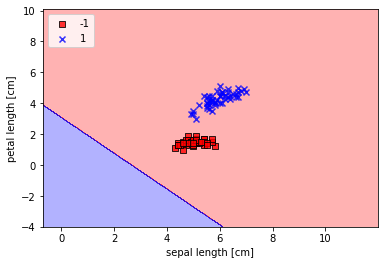

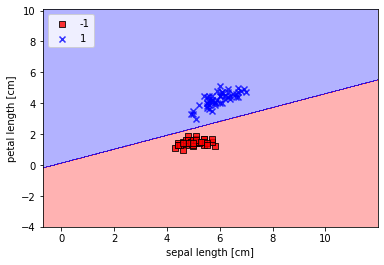

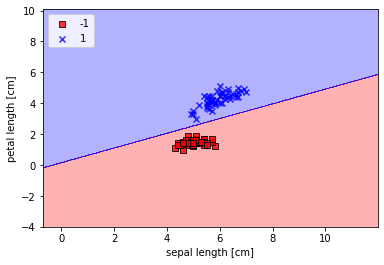

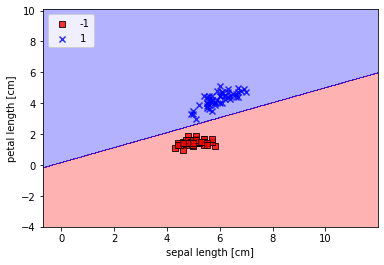

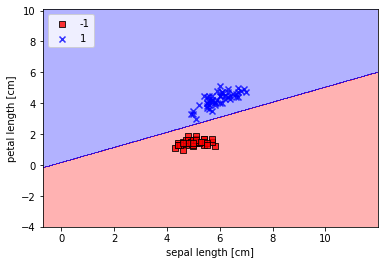

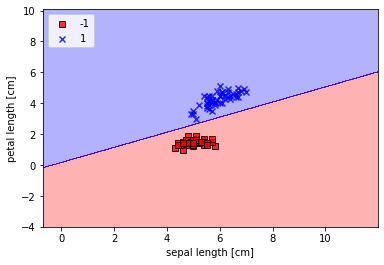

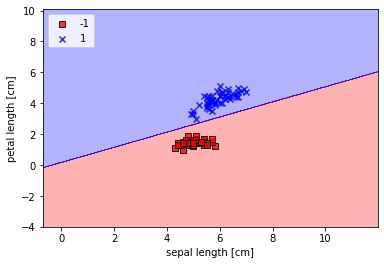

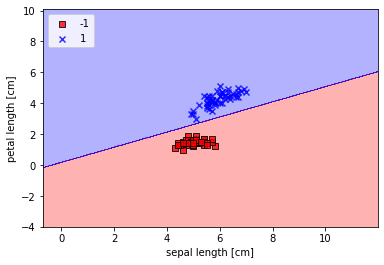

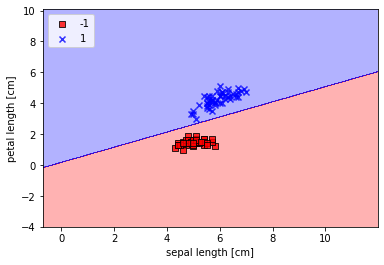

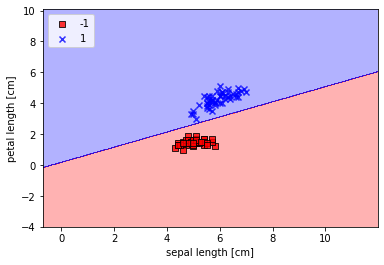

In [42]:
for n in range(0, 500,50):
    ppn = Adaline(eta=0.0001, n_iter=n)
    ppn.fit(X, y)
    
    plot_decision_regions(X, y, classifier=ppn)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.legend(loc='upper left')
    plt.show()

In [44]:
# Standarization
X_std = np.copy(X)
for col in range(0,2):
    print(col)
    X_std[:,col] = (X[:,col] - X[:,col].mean()) / X[:,col].std()

0
1


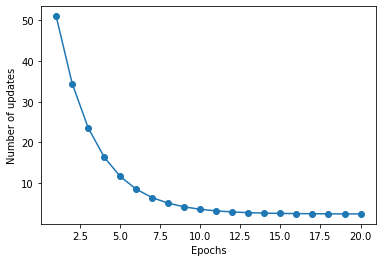

In [49]:
# Training
ppn = Adaline(eta=0.01, n_iter=20)
ppn.fit(X_std, y)
plt.plot(range(1, len(ppn.cost_) + 1),
        ppn.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()